### Initial Setup

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn 

import warnings
warnings.filterwarnings('ignore')

### Data

Untuk menjawab permasalahan, kita akan menganalisa data pengiriman yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/file/d/1LiIEty4z_jZSIV7CvsNjMTpQuuAdDDha/view). 

### Load Data 

In [24]:
df = pd.read_csv('C:/Users/Ihza/Downloads/Capstone_Project2/capstone_project2/data/raw/Online Retail Shipping.csv')

# `Data Understanding and Cleaning` 

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara domain knowledge maupun secara statistik.

Dataset ini berisi informasi terkait warehouse block, shipment methods, product cost, importance of the product, dan lain-lain. Ada 12 kolom di dalam dataset Online Retail Shipping, yaitu:
* __ID :__ ID number of customers.
* __Warehouse block :__ The company has a big warehouse that is divided into blocks (A-E).
* __Mode of shipment :__ The company ships the products in multiple ways (Ship, Flight, and
Road).
* __Customer care calls :__ The number of calls made from inquiries for inquiries of the
shipment.
* __Customer rating :__ Rate from each customer. 1 is the lowest, and 5 is the highest.
* __Cost of the product :__ Cost of the product in US Dollars.
* __Prior purchases :__ The number of previous purchases.
* __Product importance :__ The company has categorized the product in various parameters
(low, medium, high).
* __Gender :__ Male and female.
* __Discount offered :__ Discount offered on that specific product.
* __Weight in gms :__ The weight in grams.
* __Reached on time :__ 1 indicates that the product has not arrived on time, and 0 indicates the
product has arrived on time.

In [25]:
# Melihat 5 baris teratas dan terbawah dari data
display(df.head(), df.tail())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


In [26]:
#Melihat jumlah baris dan kolom dataset
print(f'Jumlah baris dan kolom dataset : {df.shape}')

Jumlah baris dan kolom dataset : (10999, 12)


In [27]:

pd.set_option('display.max_colwidth',1)
# info dan data unik di tiap kolom
pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'neg_value': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

,feature,data_type,null_value,neg_value,n_unique,sample_unique
0,ID,int64,0.0,False,10999,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Warehouse_block,object,0.0,False,5,"[D, F, A, B, C]"
2,Mode_of_Shipment,object,0.0,False,3,"[Flight, Ship, Road]"
3,Customer_care_calls,int64,0.0,False,6,"[4, 2, 3, 5, 6, 7]"
4,Customer_rating,int64,0.0,False,5,"[2, 5, 3, 1, 4]"
5,Cost_of_the_Product,int64,0.0,False,215,"[177, 216, 183, 176, 184, 162, 250, 233, 150, 164, 189, 232, 198, 275, 152, 227, 143, 239, 145, 161, 156, 211, 251, 225, 172, 234, 266, 257, 223, 149, 137, 181, 215, 269, 139, 174, 151, 210, 169, 160, 190, 141, 165, 170, 203, 246, 238, 193, 221, 179, 105, 261, 202, 109, 158, 231, 206, 187, 230, 113, 180, 132, 217, 197, 185, 278, 229, 186, 286, 175, 219, 213, 235, 271, 144, 218, 263, 168, 265, 205, 252, 222, 220, 147, 200, 224, 247, 280, 157, 207, 237, 264, 248, 191, 146, 135, 98, 97, 114, 112, ...]"
6,Prior_purchases,int64,0.0,False,8,"[3, 2, 4, 6, 5, 7, 10, 8]"
7,Product_importance,object,0.0,False,3,"[low, medium, high]"
8,Gender,object,0.0,False,2,"[F, M]"
9,Discount_offered,int64,0.0,False,65,"[44, 59, 48, 10, 46, 12, 3, 11, 29, 32, 1, 43, 45, 6, 36, 18, 38, 51, 2, 28, 24, 31, 61, 22, 4, 62, 16, 56, 15, 9, 40, 37, 41, 17, 64, 52, 49, 39, 14, 33, 21, 13, 23, 26, 57, 7, 35, 8, 5, 53, 55, 47, 65, 25, 50, 60, 20, 19, 63, 58, 34, 54, 27, 42, 30]"


In [28]:
#melihat statistik deskriptif masing-masing kolom
display(df.describe(), df.describe(include='object'))

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


### Mencari data duplikat

In [29]:
df[df.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


Tidak terdapat duplikasi data pada tiap kolom dataset

### Mendeteksi Missing Value

In [30]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

<Axes: >

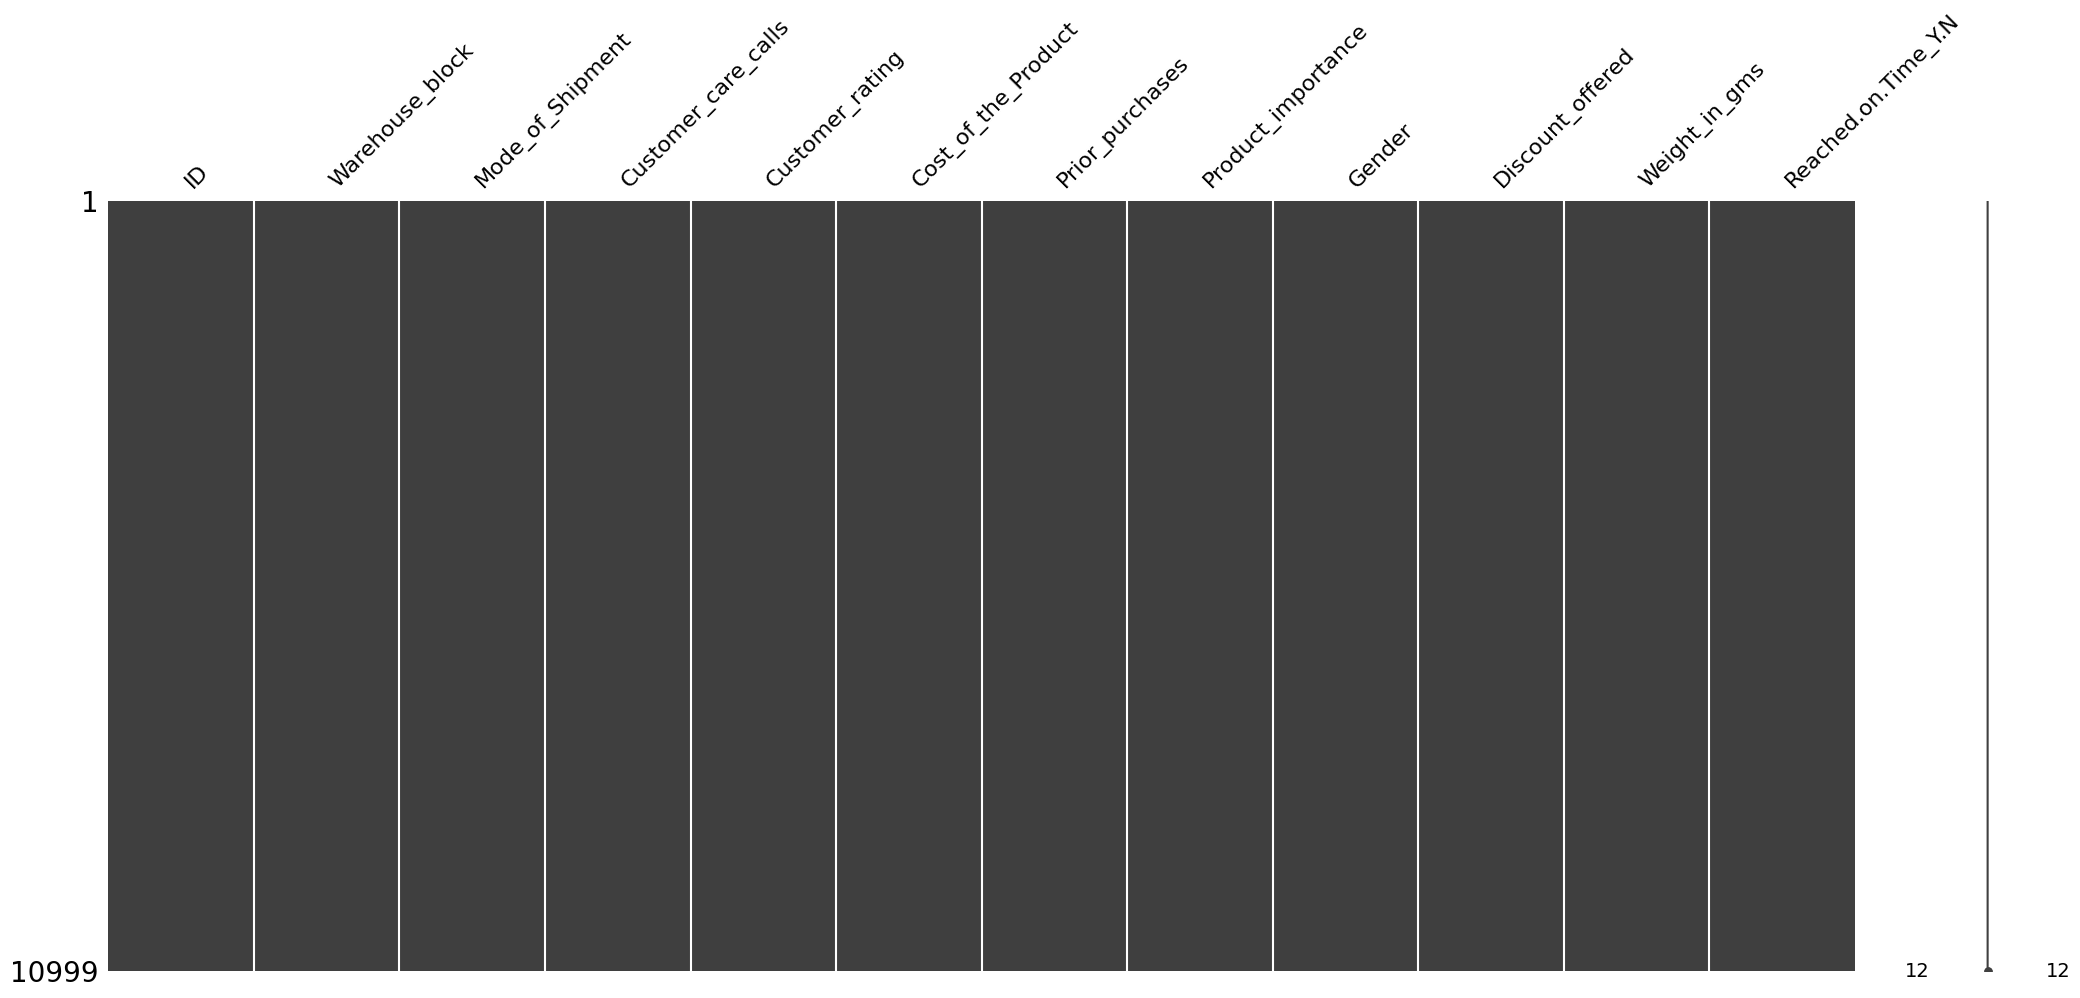

In [31]:
msn.matrix(df)

* tidak terdapat missing value dalam dataset

Insight.

Secara umum kita dapat melihat bahwa:
* Dataset Online Retail Shipping terdiri dari 12 kolom dan 10.999 baris
* Tidak terdapat duplikasi data
* Tidak terdapat missing value dalam dataset (tidak ada null value)
* Data tidak memiliki kesalahan format dalam penulisan
* Kolom `ID` berisikan id unik untuk tiap customer, sehingga tidak relevan dalam analisis dan dapat dihapuskan.
* Kolom `Customer_care_calls`, `Prior_purchases` dan `Weight_in_gms` akan dilakukan diskritisasi dalam bentuk interval.

### Mendeteksi Outlier
Outlier merupakan data yang berbeda secara signifikan dari data pengamatan lain. Outlier dapat berpengaruh pada hasil pengambilan keputusan setelah analisa. Ada beberapa faktor yang menyebabkan munculnya data outlier yaitu kesalahan penginputan data, fakta dilapangan memang seperti itu, subjek yang tidak mengerti satuan pertanyaan, dan sebagainya.

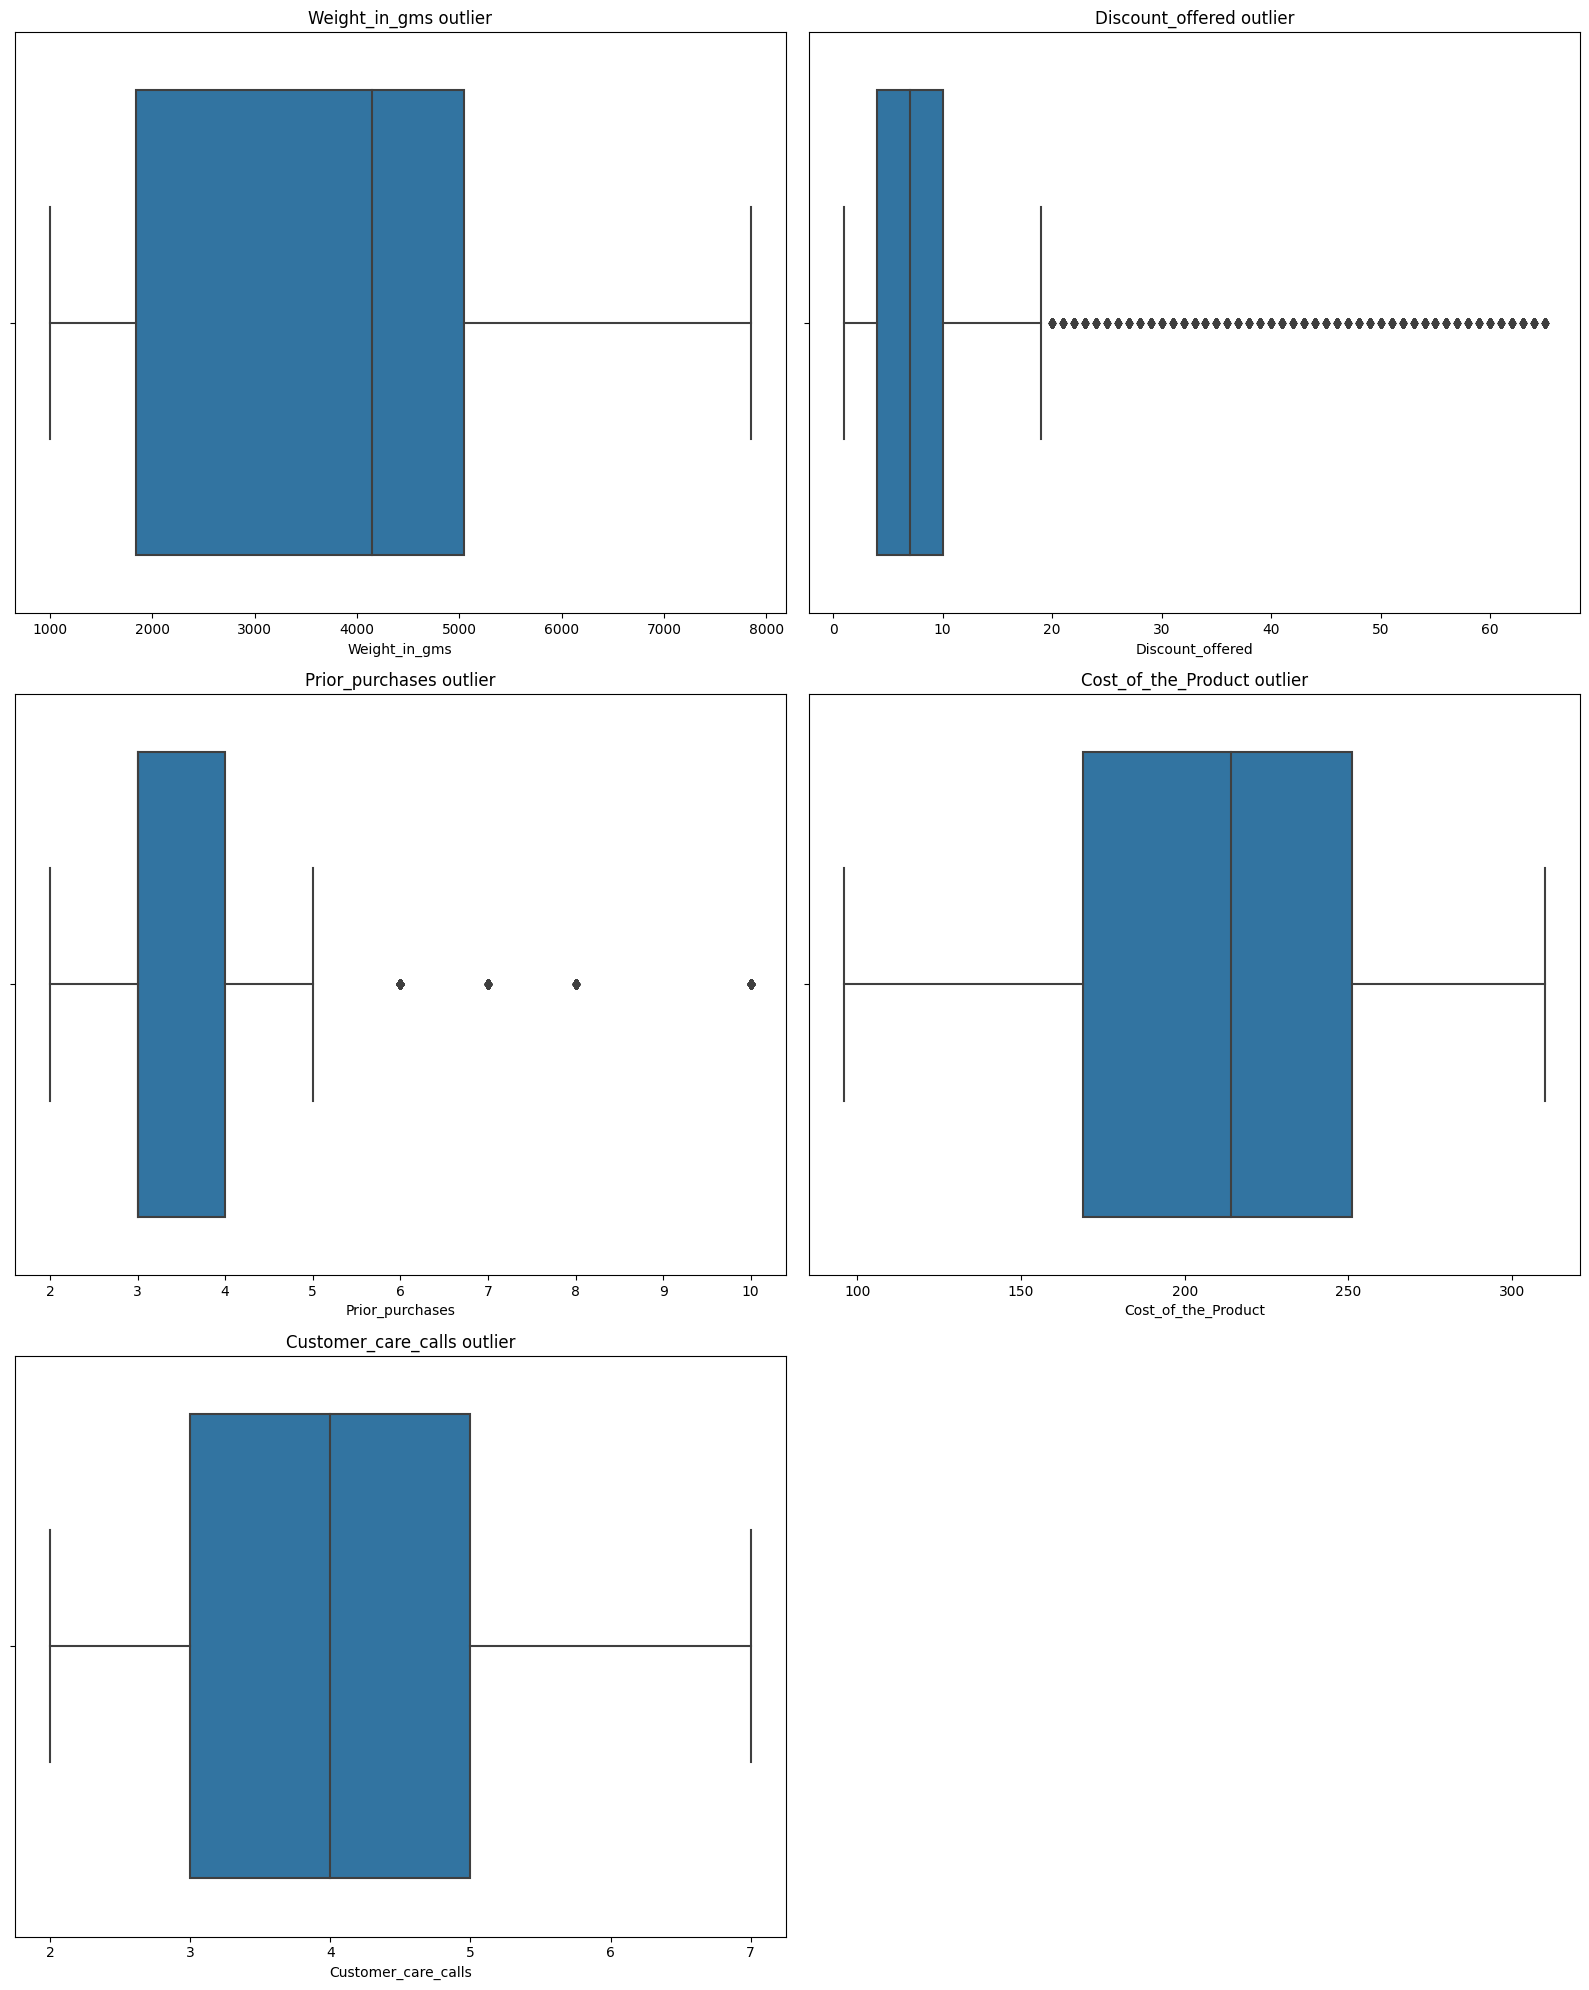

In [32]:
num_cols = ['Weight_in_gms', 'Discount_offered', 'Prior_purchases', 'Cost_of_the_Product','Customer_care_calls']

plt.figure(figsize = (16, 20))
plotnumber = 1
for i in range(len(num_cols)):
        ax = plt.subplot(3, 2, plotnumber)
        sns.boxplot(x = num_cols[i], data = df, ax = ax)
        plt.title(f'{num_cols[i]} outlier')
        plotnumber += 1

plt.tight_layout()
plt.show()

Terdapat outlier pada kolom `Discount_offered` dan `Prior_purchases`, namun tidak dilakuan data handling pada kolom `Discount_offered` dianggap normal selama diskon berada dalam rentang 0-100, dan untuk kolom `Prior_purchases` sendiri akan dilakukan diskritisasi kedalam bentuk interval untuk menghilangkan outlier

### Data Formating

* mengganti nama kolom untuk memudahkan analisis

In [33]:
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].apply(lambda x: 'ontime' if x == 0 else 'late')

* Diskritisasi atribut `Customer_care_calls`, `Prior_purchases` dan `Weight_in_gms` untuk digunakan dalam analisis.

In [34]:
print(f"Customer_care_calls: median {df['Customer_care_calls'].median()} - MAD {abs(df['Customer_care_calls'] - df['Customer_care_calls'].median()).median()}")
print(f"Prior_purchases: median {df['Prior_purchases'].median()} - MAD {abs(df['Prior_purchases'] - df['Prior_purchases'].median()).median()}")
print(f"Weight_in_gms: median {df['Weight_in_gms'].median()} - MAD {abs(df['Weight_in_gms'] - df['Weight_in_gms'].median()).median()}")

Customer_care_calls: median 4.0 - MAD 1.0
Prior_purchases: median 3.0 - MAD 1.0
Weight_in_gms: median 4149.0 - MAD 1332.0


Gunakan median dan MAD sebagai dasar membagi kelompoknya.

In [35]:
def convert_calls(x):
    if x <= 3:
        return 'seldom calls'
    elif x < 5:
        return 'occasionally calls'
    else:
        return 'frequently calls'
    
def convert_prior(x):
    if x > 3:
        return '> 3 purchase'
    else:
        return '0-3 purchase'
    
def convert_weight(x):
    if x <= 2817:
        return 'light'
    elif x < 5481:
        return 'medium'
    else:
        return 'heavy'

df_cleaned = df.assign(
    Customer_calls_class= df['Customer_care_calls'].apply(lambda x: convert_calls(x)),
    Prior_purchase_category= df['Prior_purchases'].apply(lambda x: convert_prior(x)),
    Weight_category= df['Weight_in_gms'].apply(lambda x: convert_weight(x))
)

* Menghapus kolom yang tidak digunakan dalam analisis

In [36]:
df_cleaned.drop(['ID','Customer_rating','Gender','Customer_care_calls','Prior_purchases','Weight_in_gms'], axis=1, inplace=True)

In [37]:
df_cleaned.sample(5,random_state=10)

,Warehouse_block,Mode_of_Shipment,Cost_of_the_Product,Product_importance,Discount_offered,Reached.on.Time_Y.N,Customer_calls_class,Prior_purchase_category,Weight_category
4567,F,Ship,262,low,2,ontime,occasionally calls,> 3 purchase,medium
6001,F,Road,270,low,3,late,occasionally calls,> 3 purchase,light
5565,B,Ship,173,medium,8,ontime,occasionally calls,0-3 purchase,medium
8999,F,Ship,189,medium,10,ontime,frequently calls,0-3 purchase,medium
7288,C,Ship,217,medium,7,late,occasionally calls,0-3 purchase,medium


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  object
dtypes: int64(7), object(5)
memory usage: 1.0+ MB


### Saving Data

Data mentah yang sudah diolah dan siap di analisis akan kita simpan dalam folder `../data/processed`

In [39]:
df_cleaned.to_csv(f'../data/processed/cleaned_data.csv', index=False)

In [40]:
df_cleaned.to_excel(r'../data/processed/cleaned_data.xlsx', index=False)